# Data preparation

En este notebook quiero utilizar los datos que tenemos para crear un tabla que este limpia y lista para ser consumida por la etapa de modeling.

El objetivo del modeling en este caso es predecir el número de usuarios activos para cierto día y cierta hora del día. En este sentido la tabla que quiero debe tener las columnas:
* dia
* hora
* usuarios_activos (target)

Donde el día sea de lunes a domingo, las horas de 00 a 23 y los usuarios activos un entero.

Luego aplicaremos modelos predictivos para poder estimar el número de usuarios activos para un día y una hora dada.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
# Leyendo los datos
estaciones = pd.read_csv('ecobiciestaciones.csv')
viajes = pd.read_csv('2018-06.csv')

In [4]:
viajes.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,31,8871,170,01/06/2018,0:00:11,133,01/06/2018,0:18:39
1,M,37,10700,123,01/06/2018,0:00:31,52,01/06/2018,0:08:16
2,M,43,6763,9,01/06/2018,0:00:45,9,01/06/2018,0:42:43
3,M,23,10316,55,01/06/2018,0:00:52,111,01/06/2018,0:13:29
4,M,23,15304,139,01/06/2018,0:00:57,155,01/06/2018,0:19:33


In [9]:
from datetime import datetime

In [29]:
# concatenar Hora_Retiro y Fecha_Retiro
viajes.fecha_hora_retiro = viajes.Fecha_Retiro+' '+viajes.Hora_Retiro

In [102]:
# convertir fecha y hora a datetime
viajes.fecha_hora_retiro.head()

def convierte_fecha(str_fecha_hora):
    return datetime.strptime(str_fecha_hora, '%d/%m/%Y %H:%M:%S')

viajes.datetime = viajes.fecha_hora_retiro.map(convierte_fecha)

In [126]:
# extraer dia de la semana
def dia_de_semana(datetime_obj):
    dia_numero = datetime_obj.weekday()
    if dia_numero == 0:
        return 'Lunes'
    elif dia_numero == 1:
        return 'Martes'
    elif dia_numero == 2:
        return 'Miercoles'
    elif dia_numero == 3:
        return 'Jueves'
    elif dia_numero == 4:
        return 'Viernes'
    elif dia_numero == 5:
        return 'Sabado'
    elif dia_numero == 6:
        return 'Domingo'
viajes['dia_semana'] = viajes.datetime.map(dia_de_semana)

In [128]:
# extraer la hora
viajes['hora'] = viajes.datetime.map(lambda x : x.hour)

In [129]:
# agrupar por dia y hora y tomar el conteo (en teoria esta es la tabla final)
viajes_clean = viajes.groupby(['dia_semana','hora']).Bici.count()
viajes_clean.head()
# viajes_clean.to_csv('viajes_clean.csv')
# viajes_clean.head()

dia_semana  hora
Domingo     0        335
            5        154
            6        462
            7        851
            8       1695
Name: Bici, dtype: int64

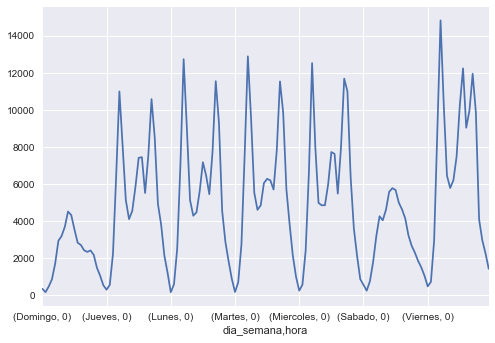

In [130]:
viajes_clean.plot()
plt.show()